# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp}&q="


#dataframe lists
city_list=[]
clouds=[]
dates=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind=[]
country=[]

#set count
count=0
set=1

#dataframe Loop
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
        if count > 48:
            count = 1
            set += 1
            city_list.append(city)
        else:
            count += 1
            city_list.append(city)
        print(f"Processing Record {count} of Set {set} | {city}")
    except Exception:
        print("City not found.")

City not found.
Processing Record 1 of Set 1 | halvad
Processing Record 2 of Set 1 | basco
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | kununurra
Processing Record 5 of Set 1 | geraldton
City not found.
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | vallenar
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | iquitos
Processing Record 12 of Set 1 | mehamn
Processing Record 13 of Set 1 | san policarpo
Processing Record 14 of Set 1 | gravelbourg
City not found.
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | alpine
Processing Record 17 of Set 1 | dingle
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | ilulissat
City not found.
Processing Record 21 of Set 1 | saiha
Processing Record 22 of Set 1 | saint-ambroise
Processing Record 23 of Set 1 | samarai
Processing Re

Processing Record 45 of Set 4 | ust-nera
Processing Record 46 of Set 4 | kurchum
Processing Record 47 of Set 4 | sao filipe
Processing Record 48 of Set 4 | nioro
Processing Record 49 of Set 4 | dehui
Processing Record 1 of Set 5 | meulaboh
Processing Record 2 of Set 5 | makakilo city
City not found.
Processing Record 3 of Set 5 | tucson
Processing Record 4 of Set 5 | mys shmidta
Processing Record 5 of Set 5 | santa elena
Processing Record 6 of Set 5 | beloha
City not found.
Processing Record 7 of Set 5 | camopi
Processing Record 8 of Set 5 | aklavik
Processing Record 9 of Set 5 | san patricio
Processing Record 10 of Set 5 | talnakh
Processing Record 11 of Set 5 | pevek
Processing Record 12 of Set 5 | port keats
Processing Record 13 of Set 5 | sitka
Processing Record 14 of Set 5 | katobu
Processing Record 15 of Set 5 | karratha
City not found.
City not found.
Processing Record 16 of Set 5 | balkhash
Processing Record 17 of Set 5 | tuktoyaktuk
Processing Record 18 of Set 5 | tiksi
Proces

Processing Record 37 of Set 8 | zeya
City not found.
Processing Record 38 of Set 8 | shunyi
Processing Record 39 of Set 8 | cacapava do sul
Processing Record 40 of Set 8 | santana do livramento
Processing Record 41 of Set 8 | olinda
Processing Record 42 of Set 8 | olovyannaya
Processing Record 43 of Set 8 | gigmoto
Processing Record 44 of Set 8 | tavda
Processing Record 45 of Set 8 | wonthaggi
Processing Record 46 of Set 8 | hanko
Processing Record 47 of Set 8 | brainerd
Processing Record 48 of Set 8 | mitsamiouli
Processing Record 49 of Set 8 | san rafael
Processing Record 1 of Set 9 | narsaq
Processing Record 2 of Set 9 | miranda
Processing Record 3 of Set 9 | roquetas de mar
Processing Record 4 of Set 9 | san andres
Processing Record 5 of Set 9 | port lincoln
Processing Record 6 of Set 9 | rocha
Processing Record 7 of Set 9 | chone
Processing Record 8 of Set 9 | figeac
Processing Record 9 of Set 9 | dunedin
Processing Record 10 of Set 9 | oksfjord
Processing Record 11 of Set 9 | poc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
city_dict={"City": city_list, "Latitude": lat,
           "Longitude": lng, "Max Temp": max_temp,
           "Humidity": humidity, "Cloudiness":clouds,
          "Wind Speed": wind, "Country": country, "Date":dates}

In [34]:
weather_df=pd.DataFrame(city_dict)
weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,halvad,23.0167,71.1833,92.52,21,0,8.75,IN,1619366012
1,basco,20.4487,121.9702,75.94,75,100,17.05,PH,1619366013
2,kapaa,22.0752,-159.3190,73.40,78,75,13.80,US,1619366013
3,kununurra,-15.7667,128.7333,60.80,88,70,1.14,AU,1619366013
4,geraldton,-28.7667,114.6000,62.60,82,0,3.44,AU,1619366014


In [48]:
weather_df.to_csv("output_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [60]:
weather_df[weather_df['Humidity']==weather_df['Humidity'].max()]


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
41,jamestown,42.0970,-79.2353,48.99,100,90,12.66,US,1619366024
78,alyangula,-13.8483,136.4192,77.00,100,82,5.75,AU,1619366035
83,hat yai,49.9464,18.2393,48.00,100,77,7.00,CZ,1619366036
104,ancud,-41.8697,-73.8203,57.99,100,90,1.03,CL,1619366043
127,vaini,-21.2000,-175.2000,73.40,100,75,1.14,TO,1619366050
130,noumea,-22.2763,166.4572,69.80,100,75,3.44,NC,1619366051
175,valdivia,-39.8142,-73.2459,48.20,100,90,3.44,CL,1619366063
290,hambantota,6.1241,81.1185,80.60,100,75,1.14,LK,1619366097
294,alofi,-19.0595,-169.9187,69.80,100,94,1.14,NU,1619365994
446,wattegama,6.7989,81.4808,80.60,100,75,1.14,LK,1619366140


In [17]:
#  Get the indices of cities that have humidity over 100%.
# No values over 100

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

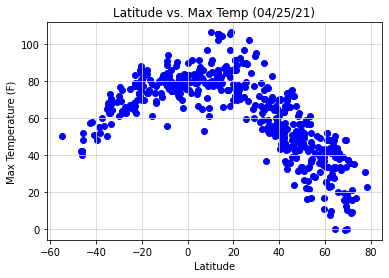

In [68]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"],facecolors="blue")
plt.title("Latitude vs. Max Temp (04/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Charts/chart1.png")
plt.show()

## Latitude vs. Humidity Plot

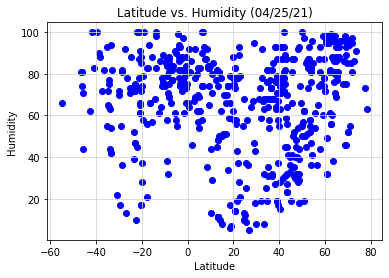

In [69]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],facecolors="blue")
plt.title("Latitude vs. Humidity (04/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Charts/chart2.png")
plt.show()

## Latitude vs. Cloudiness Plot

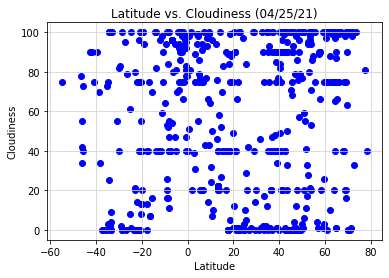

In [70]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],facecolors="blue")
plt.title("Latitude vs. Cloudiness (04/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Charts/chart3.png")
plt.show()

## Latitude vs. Wind Speed Plot

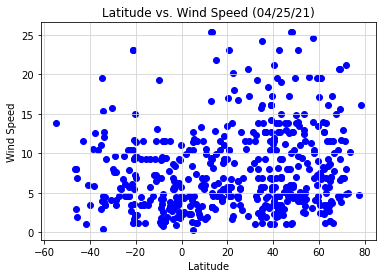

In [71]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],facecolors="blue")
plt.title("Latitude vs. Wind Speed (04/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Charts/chart4.png")
plt.show()

## Linear Regression

In [79]:
northern_hem= weather_df.loc[weather_df["Latitude"]>=0]
southern_hem=weather_df.loc[weather_df["Latitude"]<0]
northern_hem.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,halvad,23.0167,71.1833,92.52,21,0,8.75,IN,1619366012
1,basco,20.4487,121.9702,75.94,75,100,17.05,PH,1619366013
2,kapaa,22.0752,-159.3190,73.40,78,75,13.80,US,1619366013
5,torbay,47.6666,-52.7314,51.01,40,20,25.32,CA,1619366014
6,tasiilaq,65.6145,-37.6368,39.20,81,75,17.27,GL,1619366014


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3831971988693891


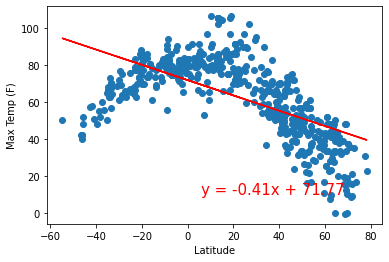

In [76]:
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.573861095580303


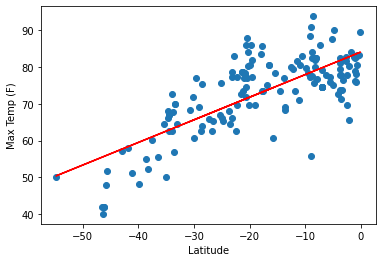

In [80]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04821151997430835


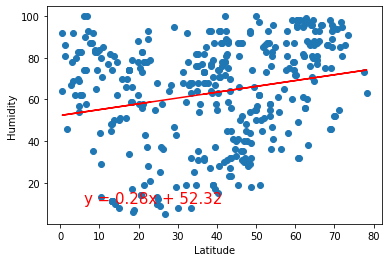

In [82]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03403130535370009


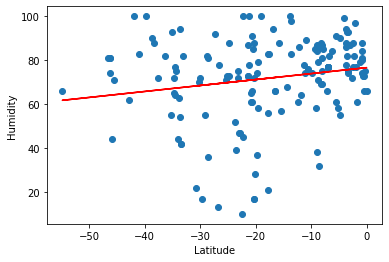

In [83]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.018922677605314065


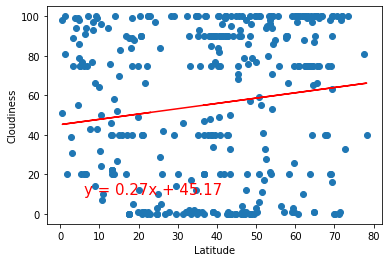

In [85]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08563426796028621


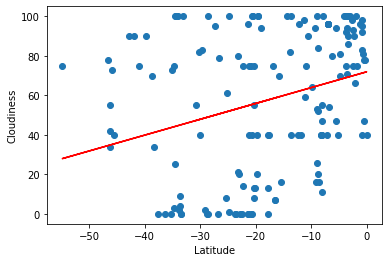

In [86]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01122035347846993


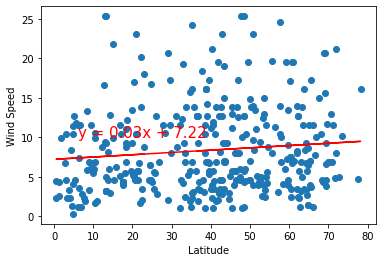

In [87]:
x_values = northern_hem['Latitude']
y_values = northern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04548245642119248


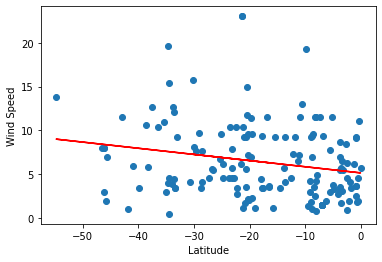

In [89]:
x_values = southern_hem['Latitude']
y_values = southern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()